# Regression

## Create Data Frame

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.DataFrame({'gender': np.random.binomial(1, 0.55, 1000),
                   'height': np.random.normal(0, 10, 1000),
                   'noise': np.random.normal(0, 2, 1000)})
df.head(10)

,gender,height,noise
0,0,-4.609024,-0.031701
1,1,-7.359381,-1.471736
2,1,8.205232,-2.119882
3,1,-12.804827,-2.261958
4,1,-7.156038,0.771543
5,1,-3.164602,-0.639115
6,0,-2.632525,2.476800
7,1,-11.739718,-1.033705
8,0,-14.749770,0.719559
9,0,3.146386,-4.677281


In [32]:
df['height'] = df['height'] + df['gender'].apply(lambda x: 160 if x else 180)
df['weight'] = df['height'] + df['noise'] -110
df.drop('noise', axis=1, inplace=True)

In [33]:
df['height_with75nan'] = df['height'].apply(lambda x: x if np.random.binomial(1, 0.25) else np.nan)
df['height_with10nan'] = df['height'].apply(lambda x: x if np.random.binomial(1, 0.9) else np.nan)

In [34]:
df

,gender,height,weight,height_with75nan,height_with10nan
0,0,175.390976,65.359275,NaN,175.390976
1,1,152.640619,41.168883,152.640619,152.640619
2,1,168.205232,56.085349,168.205232,168.205232
3,1,147.195173,34.933214,NaN,147.195173
4,1,152.843962,43.615505,NaN,152.843962
...,...,...,...,...,...
995,0,204.398867,92.287548,NaN,204.398867
996,0,173.198179,64.043508,NaN,173.198179
997,0,182.103739,70.209015,NaN,182.103739
998,1,158.463664,47.164613,NaN,158.463664


In [35]:
df.isna().mean()

gender              0.000
height              0.000
weight              0.000
height_with75nan    0.743
height_with10nan    0.092
dtype: float64

C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_11208\971491414.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


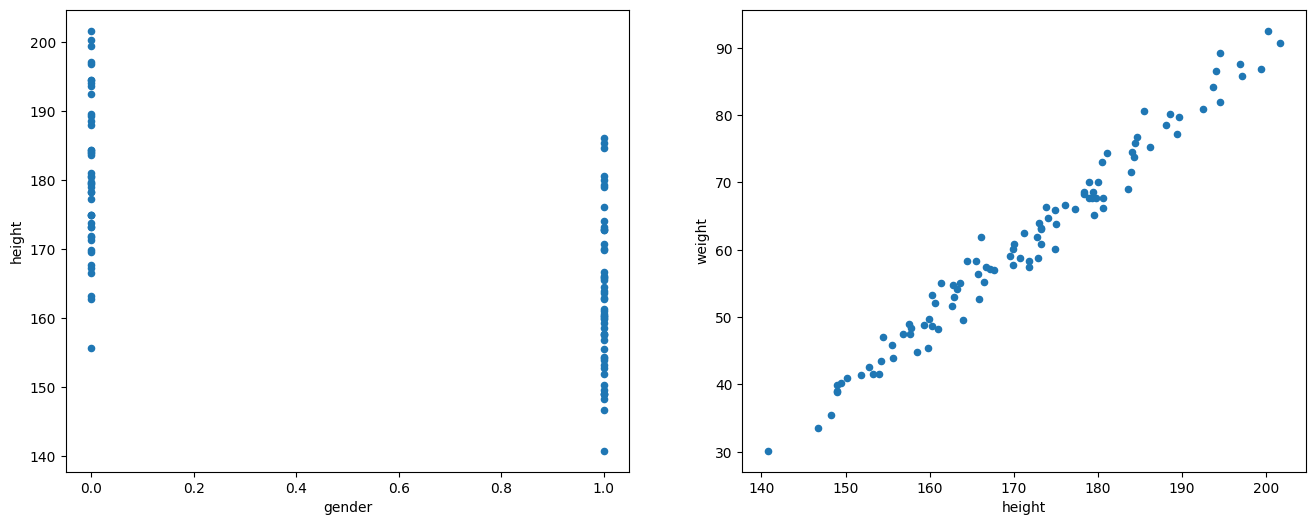

In [38]:
df_plot = df.sample(100)
fig, ax = plt.subplots(1,2, figsize=(16, 6))
df_plot.plot(kind='scatter', x='gender', y='height', ax=ax[0])
df_plot.plot(kind='scatter', x='height', y='weight', ax=ax[1])
fig.show()

## Regression

In [43]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df['height'].values.reshape(-1, 1), df['weight'])

LinearRegression()

In [46]:
print('Weight = {:.2f} + Height * {:.2f}'.format(reg.intercept_, reg.coef_[0]))


Weight = -109.82 + Height * 1.00


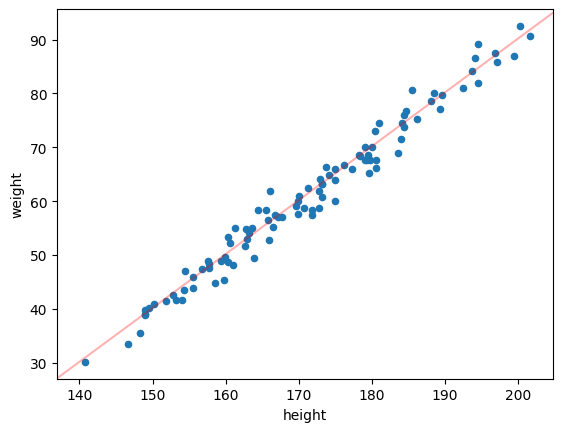

In [61]:
df_plot.plot(kind='scatter', x='height', y='weight')
# Two possibilities how to draw the regression line: first old version, second from matplot version 3.3
# plt.plot([140, 200], [-109.82+140*1, -109.82+200*1], color='red', alpha=0.3)
plt.axline([140, -109.82+140*1], [200, -109.82+200*1], color='red', alpha=0.3)